In [121]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    py_file_location = "/content/drive/MyDrive/Tesis/Git/RedVolcanica"
    %cd "{py_file_location}" 
    IN_COLAB = True
except:
    IN_COLAB = False
print(IN_COLAB)  

False


In [122]:
import importlib

import RedFunciones.visualizacion as visualizacion
import RedFunciones.Generador as Generador
import RedFunciones.Discriminador as Discriminador
import RedFunciones.auxiliares as auxiliares
import RedFunciones.DataloaderVol as DataloaderVol
import RedFunciones.Checkpoint as Checkpoint

importlib.reload(auxiliares)
importlib.reload(Generador)
importlib.reload(Discriminador)
importlib.reload(DataloaderVol)
importlib.reload(Checkpoint)

SyntaxError: invalid syntax (auxiliares.py, line 57)

In [123]:
import torch
from torch import nn
import torchaudio

from tqdm.auto import tqdm # Progress bar

from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST #noned

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#torch.manual_seed(0) # Set for our testing purposes, please do not change!



criterion: the loss function

n_epochs: the number of times you iterate through the entire 
dataset when training

z_dim: the dimension of the noise vector

display_step: how often to display/visualize the images

batch_size: the number of images per forward/backward pass

lr: the learning rate

device: the device type

In [124]:
import os
cwd = os.getcwd()
print(cwd)

/home/fgrijalva/RedVolcanica/RedVolcanica


criterion: the loss function

n_epochs: the number of times you iterate through the entire 
dataset when training

z_dim: the dimension of the noise vector

display_step: how often to display/visualize the images

batch_size: the number of images per forward/backward pass

lr: the learning rate

device: the device type

In [125]:
mnist_shape = (1, 129, 33) #tamaño imagen
n_classes = 2 # numkero etiquetas
cuda0 = torch.device('cuda:0')
cpu = 'cpu'

device = torch.device(cuda0 if torch.cuda.is_available() else cpu)

criterion = nn.BCEWithLogitsLoss()
n_epochs = 5
z_dim = 64
display_step = 100
batch_size = 25
lr = 0.0002
nombre = 'master'
nombre_carga = 'master-2021-11-18.pt'
guardar = True
cargar = False
save_steep = 1

epoch_temp = -1
gen_loss_temp = torch.empty([])
disc_loss_temp = torch.empty([]) 

In [116]:
myDataA = DataloaderVol.VolcanoDatasetH5(h5_filename)

dataloaderA = DataLoader(
    myData,
    batch_size=batch_size,
    shuffle=True)

def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in dataloader:
        # Mean over batch, height and width, but not over the channels
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum / num_batches

    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

mean, std = get_mean_and_std(dataloaderA)

print(mean)
print(std)

tensor([-0.3571])
tensor([0.5000])


In [126]:
#cargar datos
dir_nam = cwd + '/basedesglosada/'
json_nam = cwd + '/data.json'
h5_filename = cwd + '/baseh5/data2.h5'

transform = transforms.Compose([
    #transforms.ToTensor(),
    transforms.Normalize((24.3609,), (102.6371,)),
    #torchaudio.transforms.MelScale(sample_rate=50, n_stft=129)
])

myData = DataloaderVol.VolcanoDatasetH5(h5_filename, transform)

dataloader = DataLoader(
    myData,
    batch_size=batch_size,
    shuffle=True)

In [127]:
generator_input_dim, discriminator_im_chan = auxiliares.get_input_dimensions(z_dim, mnist_shape, n_classes)

gen = Generador.Generator(input_dim=generator_input_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminador.Discriminator(im_chan=discriminator_im_chan).to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

gen = gen.float()
disc = disc.float()
gen = gen.apply(auxiliares.weights_init)
disc = disc.apply(auxiliares.weights_init)

In [128]:
if cargar:
    compelto = Checkpoint.DIRECTORY + nombre_carga
    checkpoint = torch.load(compelto)
    gen.load_state_dict(checkpoint['gen'])
    disc.load_state_dict(checkpoint['disc'])
    gen_opt.load_state_dict(checkpoint['gen_opt'])
    disc_opt.load_state_dict(checkpoint['disc_opt'])
    epoch_temp = checkpoint['epoch']
    gen_loss_temp = checkpoint['gen_loss']
    disc_loss_temp = checkpoint['dis_loss']
    print('Modelo cargado')
    print('epoch: ' + str(epoch_temp))

Epoch: 0


  0%|          | 0/801 [00:00<?, ?it/s]

Red Funcionando
Step 100: Generator loss: 0.9400522619187499, discriminator loss: 9.795910203456879


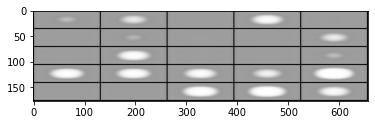

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


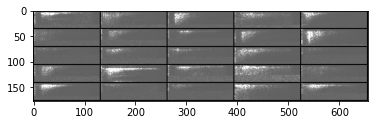

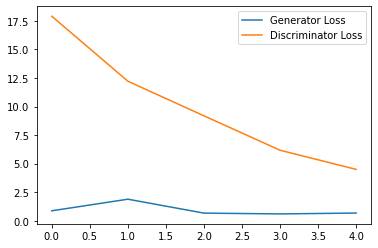

Step 200: Generator loss: 0.48302491903305056, discriminator loss: 2.3304398608207704


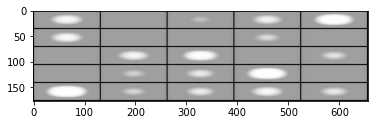

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


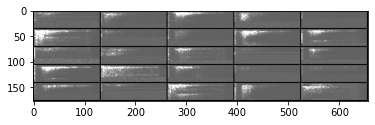

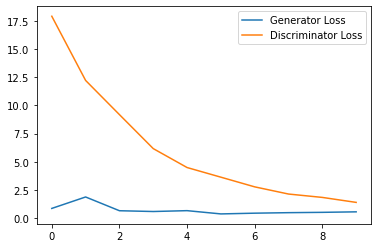

Step 300: Generator loss: 0.7135370114445686, discriminator loss: 0.8766005259752273


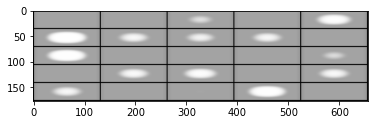

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


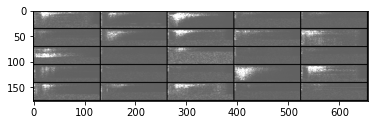

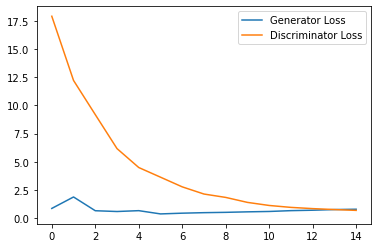

Step 400: Generator loss: 0.9165636765956878, discriminator loss: 0.6212561848759651


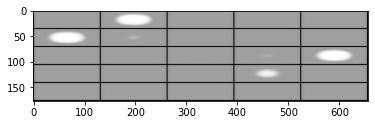

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


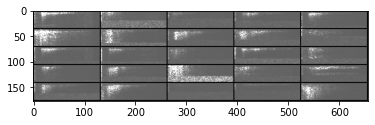

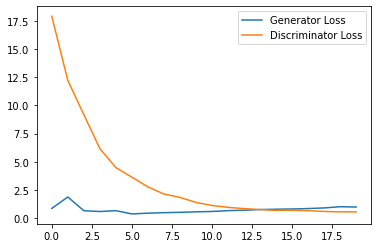

Step 500: Generator loss: 0.8197206819057464, discriminator loss: 0.6464395564794541


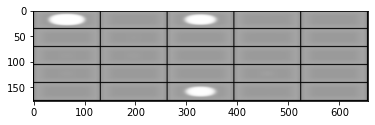

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


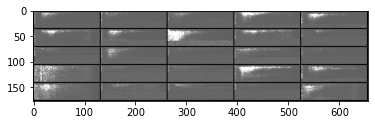

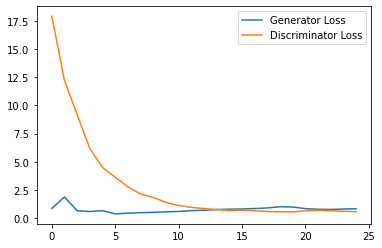

Step 600: Generator loss: 0.9693551856279373, discriminator loss: 0.5071158468723297


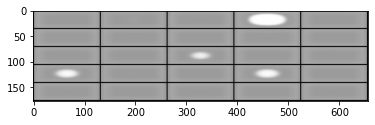

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


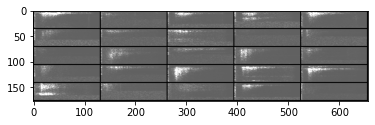

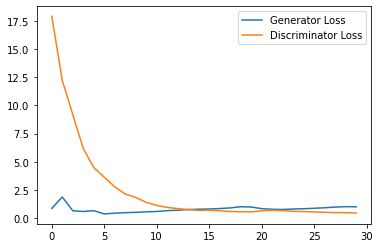

Step 700: Generator loss: 1.1330130887031555, discriminator loss: 0.5500661885738373


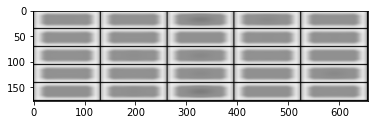

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


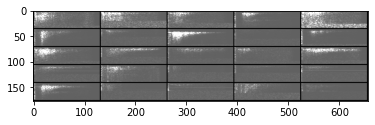

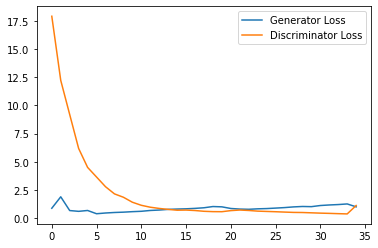

Step 800: Generator loss: 1.192673270702362, discriminator loss: 0.484137502014637


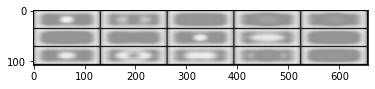

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


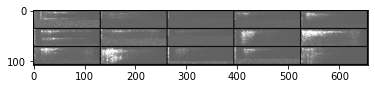

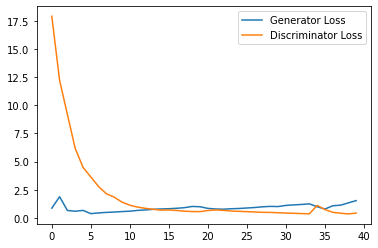

epoch guardada
Epoch: 1


  0%|          | 0/801 [00:00<?, ?it/s]

Step 900: Generator loss: 1.0693622505664826, discriminator loss: 0.5684469017386437


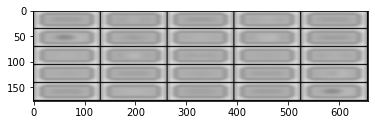

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


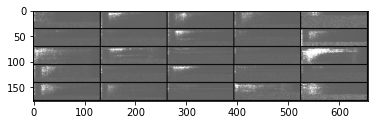

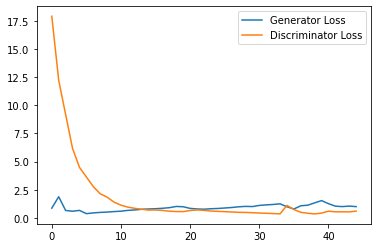

Step 1000: Generator loss: 1.012786260843277, discriminator loss: 0.5577764502167701


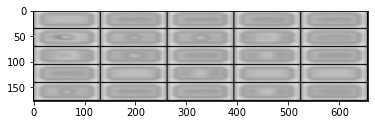

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


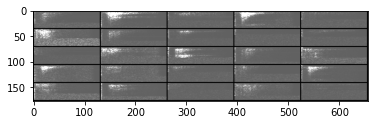

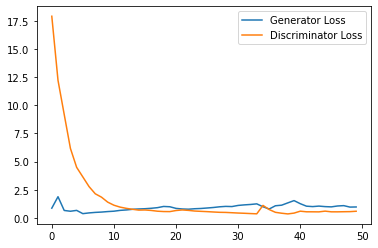

Step 1100: Generator loss: 1.1218546098470688, discriminator loss: 0.47808058112859725


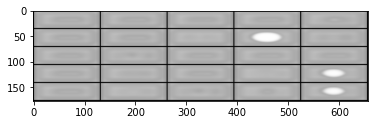

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


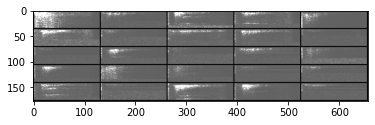

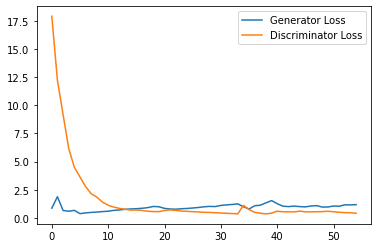

Step 1200: Generator loss: 1.4179744160175323, discriminator loss: 0.40574183806777


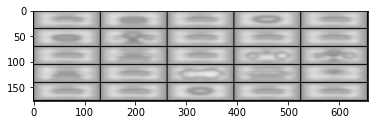

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


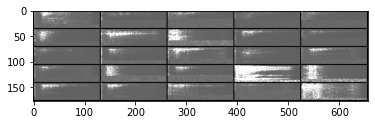

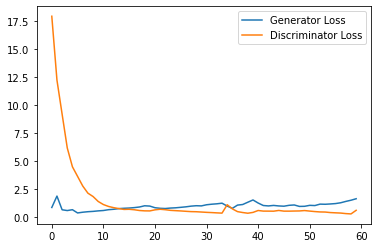

Step 1300: Generator loss: 0.7849433976411819, discriminator loss: 0.7629013875126839


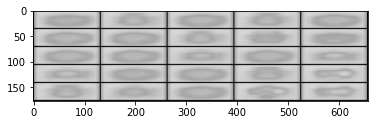

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


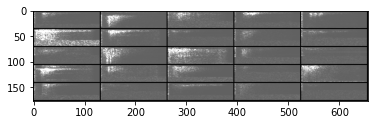

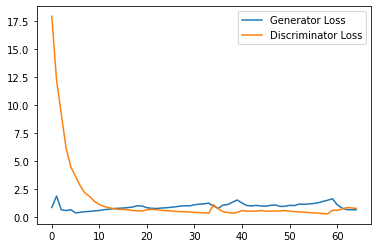

Step 1400: Generator loss: 0.875505598783493, discriminator loss: 0.6243251037597656


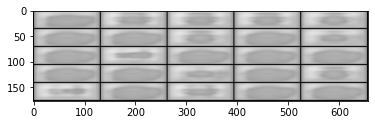

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


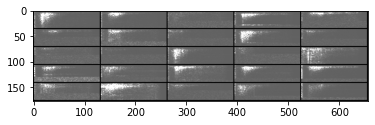

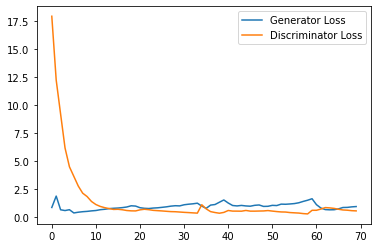

Step 1500: Generator loss: 1.046426111459732, discriminator loss: 0.5350740402936935


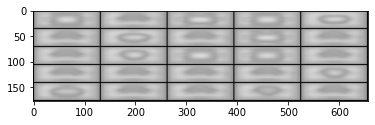

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


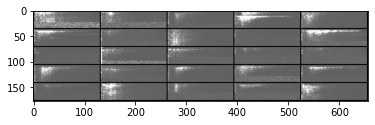

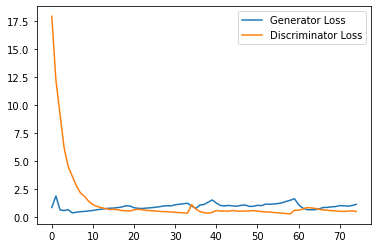

Step 1600: Generator loss: 1.2204632407426834, discriminator loss: 0.45761475294828413


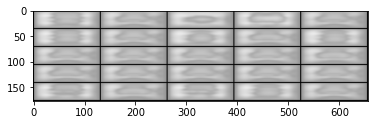

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


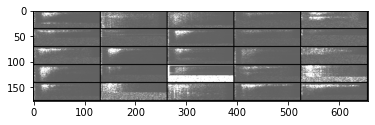

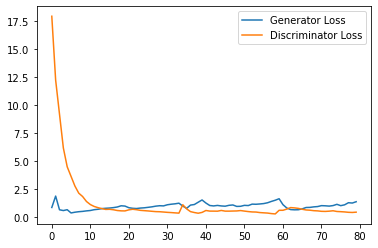

epoch guardada
Epoch: 2


  0%|          | 0/801 [00:00<?, ?it/s]

Step 1700: Generator loss: 1.293252736926079, discriminator loss: 0.47371639996767045


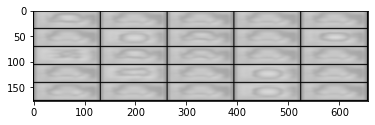

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


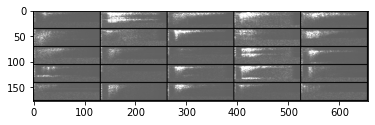

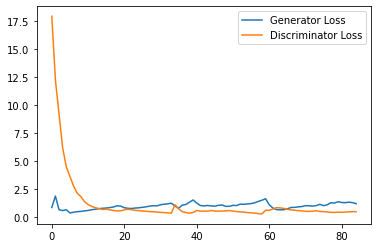

Step 1800: Generator loss: 1.2429677224159241, discriminator loss: 0.47211271822452544


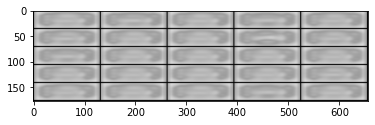

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


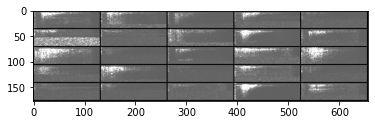

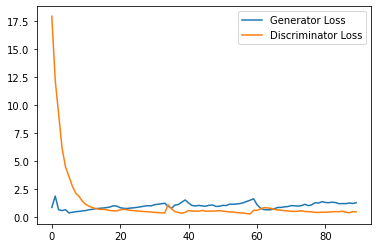

Step 1900: Generator loss: 1.5570477652549743, discriminator loss: 0.30507083535194396


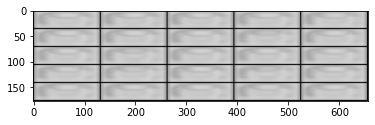

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


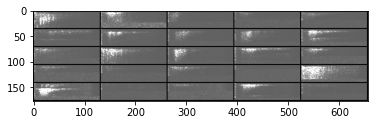

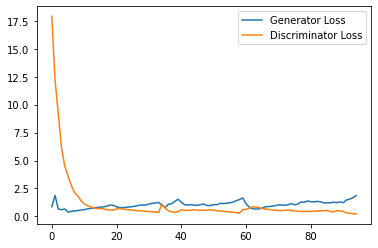

Step 2000: Generator loss: 1.3727598348259926, discriminator loss: 0.49098546043038366


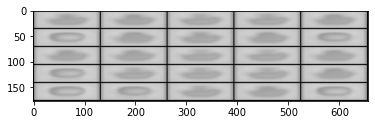

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


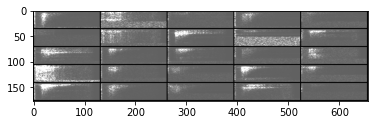

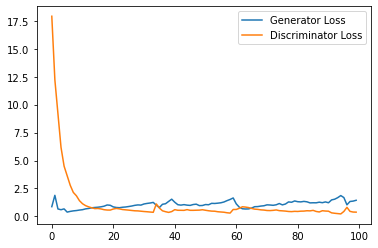

Step 2100: Generator loss: 1.544332914352417, discriminator loss: 0.35781218826770783


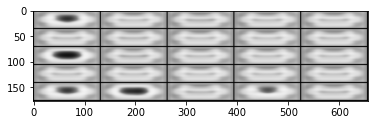

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


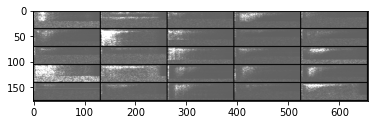

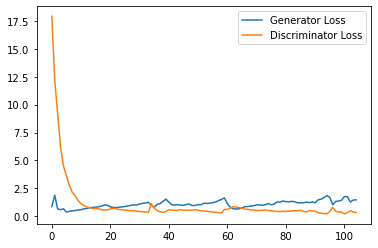

Step 2200: Generator loss: 1.9026199412345886, discriminator loss: 0.2149077832698822


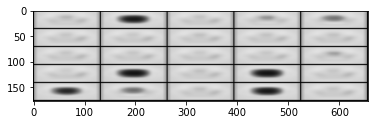

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


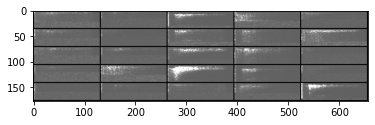

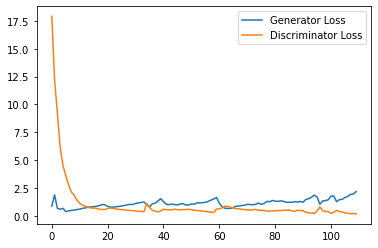

Step 2300: Generator loss: 2.156220142841339, discriminator loss: 0.17452396120876074


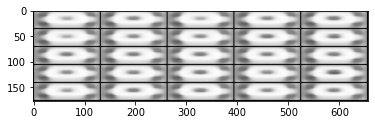

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


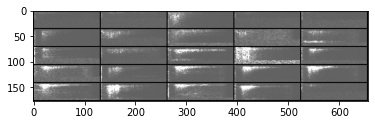

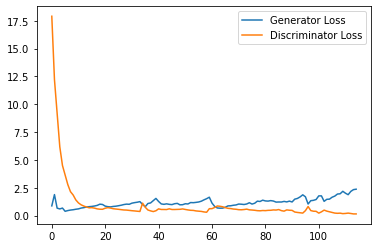

Step 2400: Generator loss: 2.517497100830078, discriminator loss: 0.16854866951704026


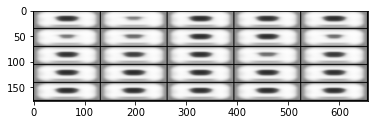

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


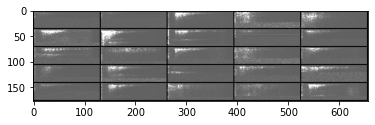

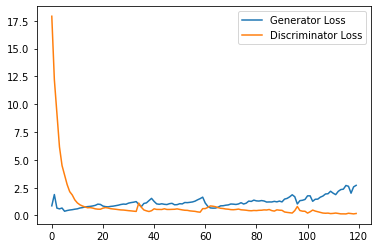

epoch guardada
Epoch: 3


  0%|          | 0/801 [00:00<?, ?it/s]

Step 2500: Generator loss: 2.9089359891414643, discriminator loss: 0.12977898973971605


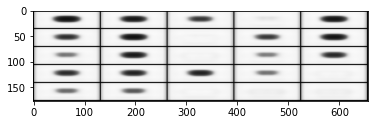

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


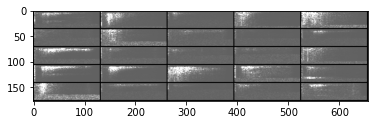

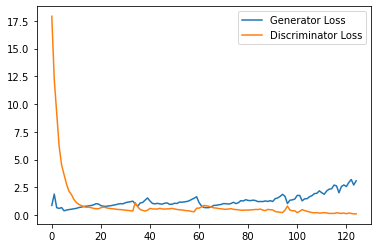

Step 2600: Generator loss: 2.997767837047577, discriminator loss: 0.10228637859225273


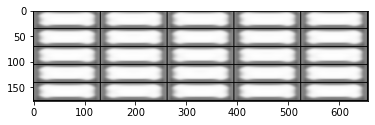

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


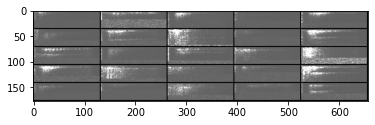

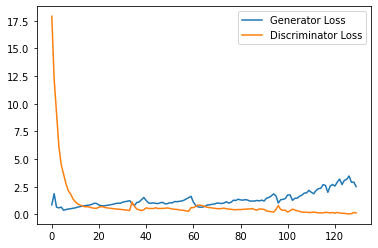

Step 2700: Generator loss: 3.1716475296020508, discriminator loss: 0.05521269856952131


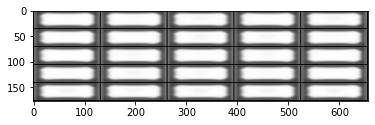

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


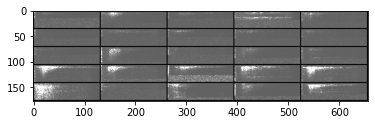

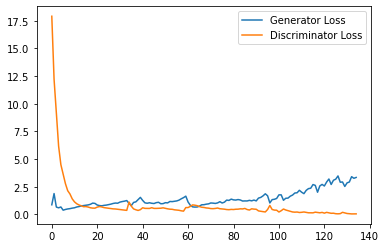

Step 2800: Generator loss: 3.556779601573944, discriminator loss: 0.05503014048561454


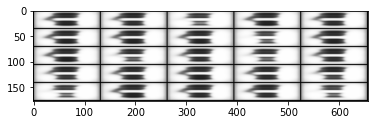

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


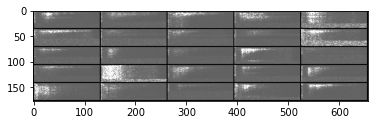

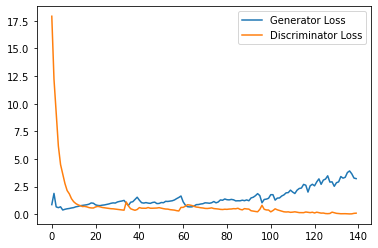

Step 2900: Generator loss: 3.0660850644111632, discriminator loss: 0.07103461887687444


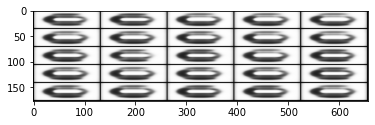

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


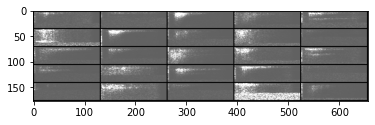

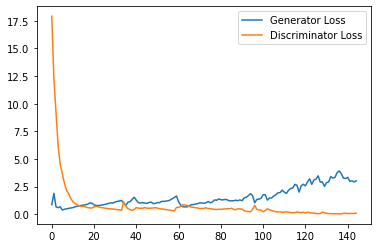

Step 3000: Generator loss: 3.186088862121105, discriminator loss: 0.0910585074685514


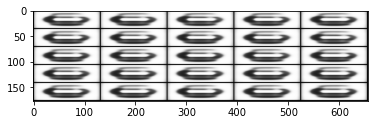

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


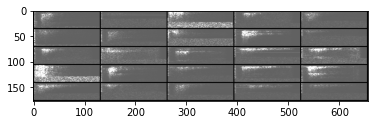

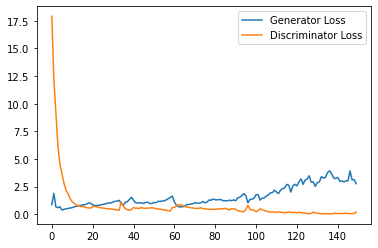

Step 3100: Generator loss: 3.24141637802124, discriminator loss: 0.09666339904069901


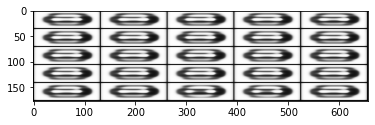

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


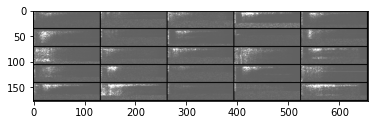

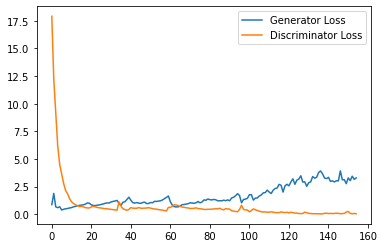

Step 3200: Generator loss: 3.461674373149872, discriminator loss: 0.04214507066644728


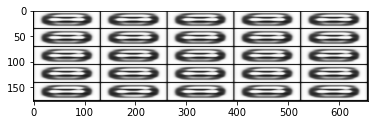

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


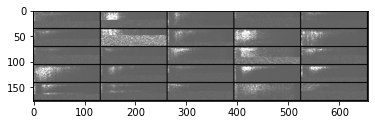

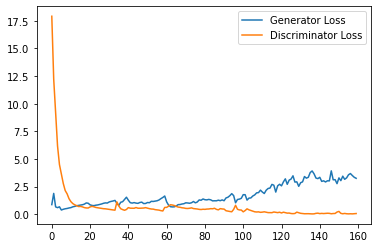

epoch guardada
Epoch: 4


  0%|          | 0/801 [00:00<?, ?it/s]

Step 3300: Generator loss: 3.4371081912517547, discriminator loss: 0.08253859559074045


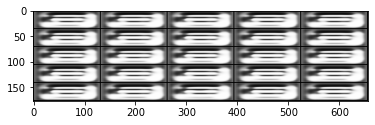

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


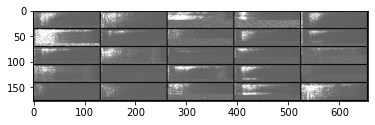

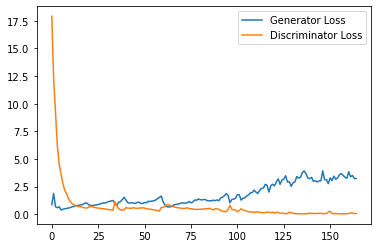

Step 3400: Generator loss: 3.486407132148743, discriminator loss: 0.05268108393065631


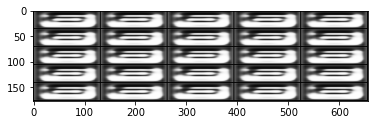

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


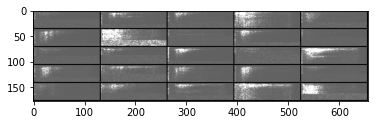

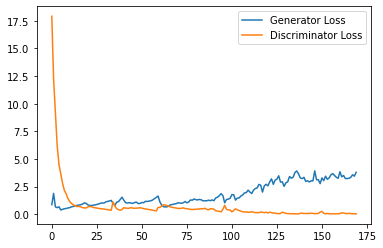

Step 3500: Generator loss: 3.620045492649078, discriminator loss: 0.05370635395869613


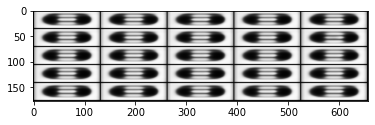

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


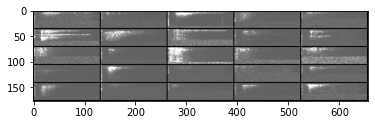

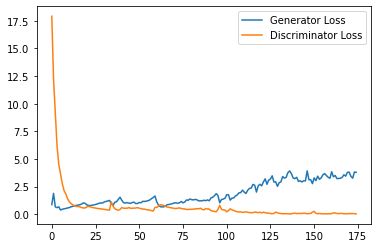

Step 3600: Generator loss: 3.702719898223877, discriminator loss: 0.04957430591806769


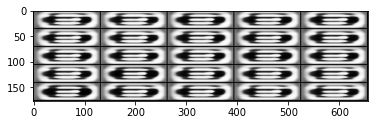

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


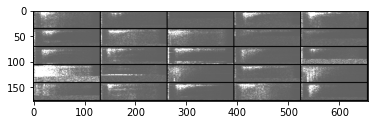

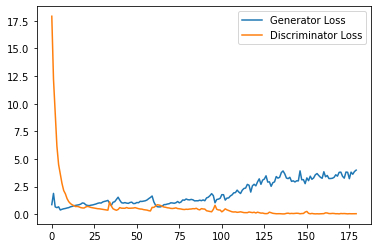

Step 3700: Generator loss: 4.266020560264588, discriminator loss: 0.06682781243231148


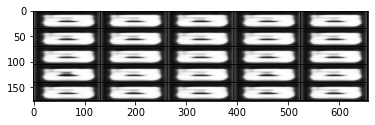

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


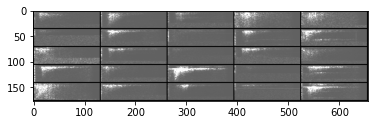

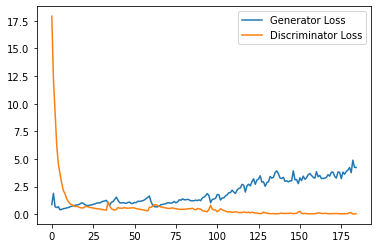

Step 3800: Generator loss: 3.9143504548072814, discriminator loss: 0.031002754108048976


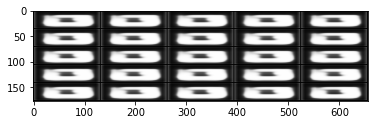

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


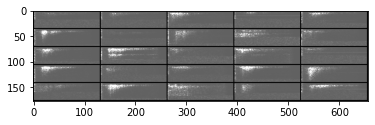

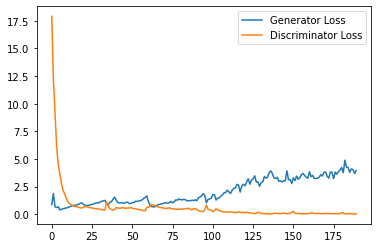

Step 3900: Generator loss: 4.233207471370697, discriminator loss: 0.023424939475953577


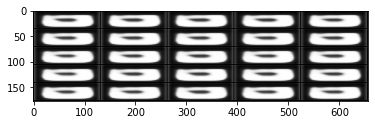

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


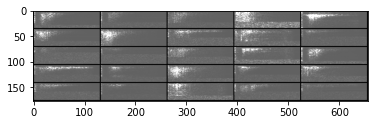

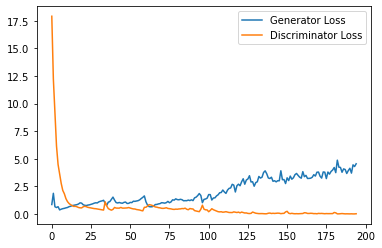

Step 4000: Generator loss: 4.257160785198212, discriminator loss: 0.02389100916683674


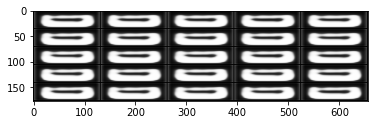

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


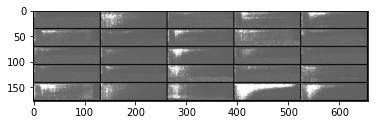

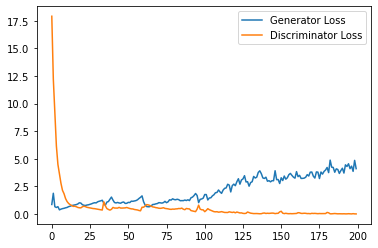

epoch guardada


In [129]:
cur_step = 0
generator_losses = []
discriminator_losses = []

for epoch in range(epoch_temp + 1, n_epochs):
    print('Epoch: ' + str(epoch))
    # Dataloader returns the batches and the labels
    for real, labels in tqdm(dataloader):
        cur_batch_size = len(real)
        # Flatten the batch of real images from the dataset
        real = real.to(device)

        one_hot_labels = auxiliares.get_one_hot_labels(labels.to(device), n_classes)
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = image_one_hot_labels.repeat(1, 1, mnist_shape[1], mnist_shape[2])

        ### Update discriminator ###
        # Zero out the discriminator gradients
        disc_opt.zero_grad()
        # Get noise corresponding to the current batch_size 
        fake_noise = auxiliares.get_noise(cur_batch_size, z_dim, device=device)
        
        # Now you can get the images from the generator
        # Steps: 1) Combine the noise vectors and the one-hot labels for the generator
        #        2) Generate the conditioned fake images
       
        noise_and_labels = auxiliares.combine_vectors(fake_noise, one_hot_labels)
        fake = gen(noise_and_labels.float())#gen.forward(noise_and_labels) no usar

        # Now you can get the predictions from the discriminator
        # Steps: 1) Create the input for the discriminator
        #           a) Combine the fake images with image_one_hot_labels, 
        #              remember to detach the generator (.detach()) so you do not backpropagate through it
        #           b) Combine the real images with image_one_hot_labels
        #        2) Get the discriminator's prediction on the fakes as disc_fake_pred
        #        3) Get the discriminator's prediction on the reals as disc_real_pred
        
        fake_image_and_labels = auxiliares.combine_vectors(fake.detach(), image_one_hot_labels)
        real_image_and_labels = auxiliares.combine_vectors(real, image_one_hot_labels)
        disc_fake_pred = disc(fake_image_and_labels.float())
        disc_real_pred = disc(real_image_and_labels.float())       
        
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2
        disc_loss.backward(retain_graph=True)
        disc_opt.step() 

        # Keep track of the average discriminator loss
        discriminator_losses += [disc_loss.item()]

        ### Update generator ###
        # Zero out the generator gradients
        gen_opt.zero_grad()

        fake_image_and_labels = auxiliares.combine_vectors(fake, image_one_hot_labels)
        # This will error if you didn't concatenate your labels to your image correctly
        disc_fake_pred = disc(fake_image_and_labels)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

        # Keep track of the generator losses
        generator_losses += [gen_loss.item()]
        #

        if cur_step % display_step == 0 and cur_step > 0:
            gen_mean = sum(generator_losses[-display_step:]) / display_step
            disc_mean = sum(discriminator_losses[-display_step:]) / display_step
            print(f"Step {cur_step}: Generator loss: {gen_mean}, discriminator loss: {disc_mean}")
            visualizacion.show_tensor_images(torch.transpose(fake, 2, 3), size=(1, 129, 33))
            visualizacion.show_tensor_images(torch.transpose(real, 2, 3), size=(1, 129, 33))
            step_bins = 20
            x_axis = sorted([i * step_bins for i in range(len(generator_losses) // step_bins)] * step_bins)
            num_examples = (len(generator_losses) // step_bins) * step_bins
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(generator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Generator Loss"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(discriminator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Discriminator Loss"
            )
            plt.legend()
            plt.show()
        elif cur_step == 0:
            print("Red Funcionando")
        cur_step += 1 
    if((guardar and epoch % save_steep == 0) or epoch == n_epochs - 1):
        Checkpoint.save_weighs(gen, disc, gen_opt, disc_opt, epoch, gen_loss, disc_loss, nombre)
        print('epoch guardada')                

In [95]:
print(fake)

tensor([[[[-0.3792, -0.3766, -0.5531,  ..., -0.5532, -0.3766, -0.4043],
          [-0.3991, -0.3799, -0.5802,  ..., -0.5802, -0.3799, -0.4178],
          [-0.5886, -0.5594, -0.8254,  ..., -0.8255, -0.5594, -0.6050],
          ...,
          [-0.5578, -0.5729, -0.7898,  ..., -0.7899, -0.5729, -0.5680],
          [-0.3679, -0.3839, -0.5269,  ..., -0.5269, -0.3839, -0.3842],
          [-0.3725, -0.3830, -0.5249,  ..., -0.5249, -0.3830, -0.3772]]],


        [[[-0.3792, -0.3766, -0.5531,  ..., -0.5532, -0.3766, -0.4043],
          [-0.3991, -0.3799, -0.5802,  ..., -0.5802, -0.3799, -0.4178],
          [-0.5886, -0.5594, -0.8254,  ..., -0.8255, -0.5594, -0.6050],
          ...,
          [-0.5578, -0.5729, -0.7898,  ..., -0.7899, -0.5729, -0.5680],
          [-0.3679, -0.3839, -0.5269,  ..., -0.5269, -0.3839, -0.3842],
          [-0.3725, -0.3830, -0.5249,  ..., -0.5249, -0.3830, -0.3772]]],


        [[[-0.3792, -0.3766, -0.5531,  ..., -0.5532, -0.3766, -0.4043],
          [-0.3991, -0.379

In [76]:
print(gen)

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(66, 512, kernel_size=(6, 2), stride=(2, 2))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(6, 3), stride=(2, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(6, 3), stride=(2, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(6, 3), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace

In [ ]:
#gen.state_dict()

In [107]:
from torchvision import models
from torchsummary import summary

summary(gen, (66,1,1))

summary(disc, (3,129,33))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1           [-1, 1024, 6, 2]         812,032
       BatchNorm2d-2           [-1, 1024, 6, 2]           2,048
              ReLU-3           [-1, 1024, 6, 2]               0
   ConvTranspose2d-4           [-1, 512, 16, 4]       9,437,696
       BatchNorm2d-5           [-1, 512, 16, 4]           1,024
              ReLU-6           [-1, 512, 16, 4]               0
   ConvTranspose2d-7           [-1, 256, 36, 6]       2,359,552
       BatchNorm2d-8           [-1, 256, 36, 6]             512
              ReLU-9           [-1, 256, 36, 6]               0
  ConvTranspose2d-10           [-1, 128, 41, 8]         589,952
      BatchNorm2d-11           [-1, 128, 41, 8]             256
             ReLU-12           [-1, 128, 41, 8]               0
  ConvTranspose2d-13           [-1, 64, 51, 12]         450,624
      BatchNorm2d-14           [-1, 64,